## Load normalized data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers

normalized_data = pd.read_csv("normalized_data.csv", index_col=0)
normalized_data

Using TensorFlow backend.


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Mr,Miss,Mrs
PassengerId,,,,,,,,,,,,,,
1,0.0,1.0,0.273456,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.473882,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.323563,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.436302,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.436302,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,1.0,NaN,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1306,NaN,0.0,0.486409,0.000,0.000000,0.212559,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1307,NaN,1.0,0.480145,0.000,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## Counting empty values

In [2]:
empty_values = [(label, normalized_data[label].isnull().sum()) for label in normalized_data.columns.values]
sorted(empty_values, reverse=True, key=lambda tup: tup[1])

[('Survived', 418),
 ('Age', 263),
 ('Pclass', 0),
 ('SibSp', 0),
 ('Parch', 0),
 ('Fare', 0),
 ('female', 0),
 ('male', 0),
 ('C', 0),
 ('Q', 0),
 ('S', 0),
 ('Mr', 0),
 ('Miss', 0),
 ('Mrs', 0)]

## Separate samples with and without age

In [3]:
samples_with_age = normalized_data[normalized_data.Age.notna()]
samples_without_age = normalized_data[normalized_data.Age.isna()]

## Creating model for age prediction

In [4]:
x_train_age = samples_with_age.drop(["Age", "Survived"], axis=1).values
y_train_age = samples_with_age["Age"].values

model = models.Sequential()
model.add(layers.Dense(12, activation="relu", input_shape=(12,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])

history = model.fit(x_train_age,
                    y_train_age,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2)


Train on 836 samples, validate on 210 samples
Epoch 1/100
836/836 [==============================] - 0s 426us/step - loss: 0.1864 - mae: 0.3382 - val_loss: 0.0268 - val_mae: 0.1314
Epoch 2/100
836/836 [==============================] - 0s 125us/step - loss: 0.0791 - mae: 0.2177 - val_loss: 0.0314 - val_mae: 0.1325
Epoch 3/100
836/836 [==============================] - 0s 130us/step - loss: 0.0583 - mae: 0.1864 - val_loss: 0.0297 - val_mae: 0.1284
Epoch 4/100
836/836 [==============================] - 0s 136us/step - loss: 0.0463 - mae: 0.1715 - val_loss: 0.0290 - val_mae: 0.1280
Epoch 5/100
836/836 [==============================] - 0s 128us/step - loss: 0.0395 - mae: 0.1558 - val_loss: 0.0284 - val_mae: 0.1281
Epoch 6/100
836/836 [==============================] - 0s 119us/step - loss: 0.0386 - mae: 0.1540 - val_loss: 0.0288 - val_mae: 0.1290
Epoch 7/100
836/836 [==============================] - 0s 117us/step - loss: 0.0351 - mae: 0.1470 - val_loss: 0.0298 - val_mae: 0.1307
Epoch 8/1

Epoch 61/100
836/836 [==============================] - 0s 134us/step - loss: 0.0264 - mae: 0.1257 - val_loss: 0.0253 - val_mae: 0.1263
Epoch 62/100
836/836 [==============================] - 0s 186us/step - loss: 0.0257 - mae: 0.1257 - val_loss: 0.0249 - val_mae: 0.1260
Epoch 63/100
836/836 [==============================] - 0s 123us/step - loss: 0.0252 - mae: 0.1224 - val_loss: 0.0241 - val_mae: 0.1250
Epoch 64/100
836/836 [==============================] - 0s 126us/step - loss: 0.0246 - mae: 0.1224 - val_loss: 0.0235 - val_mae: 0.1244
Epoch 65/100
836/836 [==============================] - 0s 119us/step - loss: 0.0249 - mae: 0.1237 - val_loss: 0.0240 - val_mae: 0.1242
Epoch 66/100
836/836 [==============================] - 0s 169us/step - loss: 0.0261 - mae: 0.1250 - val_loss: 0.0249 - val_mae: 0.1255
Epoch 67/100
836/836 [==============================] - 0s 141us/step - loss: 0.0249 - mae: 0.1220 - val_loss: 0.0241 - val_mae: 0.1251
Epoch 68/100
836/836 [==========================

## Drwing plots for age prediction

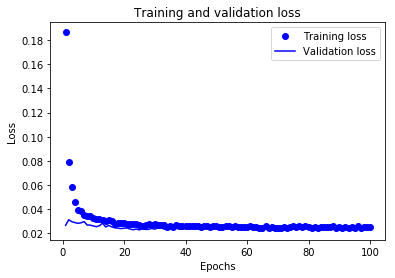

In [5]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Evaluate results for age prediction

In [6]:
results_age = model.predict(samples_without_age.drop(["Survived", "Age"], axis=1))
samples_without_age.loc[:,"Age"] = results_age
samples_without_age

/home/victor/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Mr,Miss,Mrs
PassengerId,,,,,,,,,,,,,,
6,0.0,1.0,0.365125,0.000,0.000000,0.016510,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
18,1.0,0.5,0.364435,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
20,1.0,1.0,0.321635,0.000,0.000000,0.014102,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27,0.0,1.0,0.307926,0.000,0.000000,0.014102,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
29,1.0,1.0,0.300824,0.000,0.000000,0.015379,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.300824,0.000,0.000000,0.015070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1302,NaN,1.0,0.300824,0.000,0.000000,0.015127,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,NaN,1.0,0.327318,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## Save data

In [7]:
normalized_data_with_predicted_age = pd.concat([samples_with_age, samples_without_age])
normalized_data_with_predicted_age.to_csv("normalized_data_with_predicted_age.csv", index=True)
normalized_data_with_predicted_age

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Mr,Miss,Mrs
PassengerId,,,,,,,,,,,,,,
1,0.0,1.0,0.273456,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.473882,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.323563,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.436302,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.436302,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.300824,0.000,0.000000,0.015070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1302,NaN,1.0,0.300824,0.000,0.000000,0.015127,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,NaN,1.0,0.327318,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


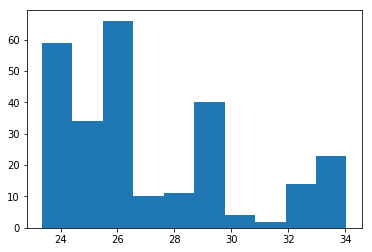

In [8]:
import matplotlib.pyplot as plt

plt.hist(results_age*80)
plt.show()

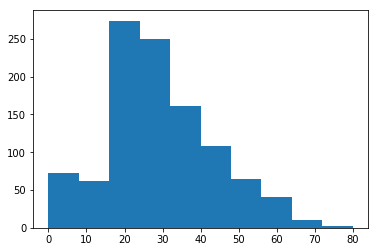

In [9]:
import matplotlib.pyplot as plt

plt.hist(samples_with_age.Age*80)
plt.show()
